In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from warnings import filterwarnings
filterwarnings('ignore')


In [139]:
#Reading dataset
df=pd.read_csv('C:/Users/Lakshay/Desktop/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [140]:
df.shape

(51717, 17)

In [141]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [142]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [144]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

# Data Cleaning

In [145]:
#cleaning Rate
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [146]:
def handleRate(value):
    if (value == 'NEW' or value =='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
        

In [147]:
df['rate']=df['rate'].apply(handleRate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [148]:
df['rate'].isna().sum()

10019

In [149]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [150]:
df['rate'].isnull().sum()

0

In [151]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [152]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [154]:
df.rename(columns={'approx_cost(for two people)':'Cost for 2','listed_in(type)':'Type','listed_in(city)':'City'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for 2,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [155]:
df=df.drop(['location'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost for 2,Type,City
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [156]:
df['Cost for 2'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [157]:
def handleCost(value):
    value=str(value)
    if ',' in value:
        value = value.replace(',','')
        return int(value) 
    else:
        return int(value)

df['Cost for 2']=df['Cost for 2'].apply(handleCost)    
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost for 2,Type,City
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [134]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [158]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [160]:
rest_types_lessThan1000 = rest_types[rest_types<1000]
rest_types_lessThan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [161]:
def lessThan1000rest_types(value):
    if(value in rest_types_lessThan1000):
        return 'Others'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(lessThan1000rest_types)    

In [162]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [163]:
df.head(10)

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost for 2,Type,City
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Others,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,North Indian,600,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Others,"Pizza, Cafe, Italian",600,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Cafe,"Cafe, Italian, Continental",700,Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Cafes,Banashankari


In [164]:
df["City"].value_counts()

BTM                      3239
Koramangala 7th Block    2901
Koramangala 5th Block    2799
Koramangala 4th Block    2742
Koramangala 6th Block    2588
Jayanagar                2351
JP Nagar                 2072
Indiranagar              1834
Church Street            1785
MG Road                  1780
Brigade Road             1764
HSR                      1727
Lavelle Road             1726
Marathahalli             1629
Bannerghatta Road        1600
Residency Road           1600
Whitefield               1589
Brookefield              1495
Old Airport Road         1380
Kammanahalli             1305
Kalyan Nagar             1285
Basavanagudi             1264
Sarjapur Road            1235
Electronic City          1214
Bellandur                1205
Frazer Town              1179
Malleshwaram             1092
Rajajinagar              1068
Banashankari              859
New BEL Road              735
Name: City, dtype: int64

In [165]:
city = df['City'].value_counts(ascending=False)
city_lessThan900 = city[city<900]


def lessThan900City(value):
    if(value in city_lessThan900):
        return 'Others'
    else:
        return value
    
df['City']=df['City'].apply(lessThan900City)  

In [166]:
df['City'].value_counts()

BTM                      3239
Koramangala 7th Block    2901
Koramangala 5th Block    2799
Koramangala 4th Block    2742
Koramangala 6th Block    2588
Jayanagar                2351
JP Nagar                 2072
Indiranagar              1834
Church Street            1785
MG Road                  1780
Brigade Road             1764
HSR                      1727
Lavelle Road             1726
Marathahalli             1629
Bannerghatta Road        1600
Residency Road           1600
Others                   1594
Whitefield               1589
Brookefield              1495
Old Airport Road         1380
Kammanahalli             1305
Kalyan Nagar             1285
Basavanagudi             1264
Sarjapur Road            1235
Electronic City          1214
Bellandur                1205
Frazer Town              1179
Malleshwaram             1092
Rajajinagar              1068
Name: City, dtype: int64

In [167]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,Cost for 2,Type,City
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Others
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Others
2,San Churro Cafe,Yes,No,3.8,918,Others,"Cafe, Mexican, Italian",800,Buffet,Others
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Others
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Others


In [168]:
cuisines = df['cuisines'].value_counts(ascending=False)
 

In [169]:
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [170]:
cuisines_lessThan100 = cuisines[cuisines<100]

def cuisines_lessthan100(value):
    if(value in cuisines_lessThan100):
        return 'Others'
    else:
        return value
    
df['cuisines']=df['cuisines'].apply(cuisines_lessthan100) 

In [171]:
df['cuisines'].value_counts()

Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

# Visualization

In [77]:
#Count Plot of Various cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Bannerghatta Road'),
  Text(2, 0, 'Basavanagudi'),
  Text(3, 0, 'Bellandur'),
  Text(4, 0, 'Brigade Road'),
  Text(5, 0, 'Brookefield'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Church Street'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'Frazer Town'),
  Text(10, 0, 'HSR'),
  Text(11, 0, 'Indiranagar'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'Kalyan Nagar'),
  Text(15, 0, 'Kammanahalli'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Koramangala 5th Block'),
  Text(18, 0, 'Koramangala 6th Block'),
  Text(19, 0, 'Koramangala 7th Block'),
  Text(20, 0, 'Lavelle Road'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Marathahalli'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Old Airport Road'),
  Text(25, 0, 'Rajajinagar'),
  Text(26, 0, 'Residency Road'),
  Text(27, 0, 'Sarjapur Road'),

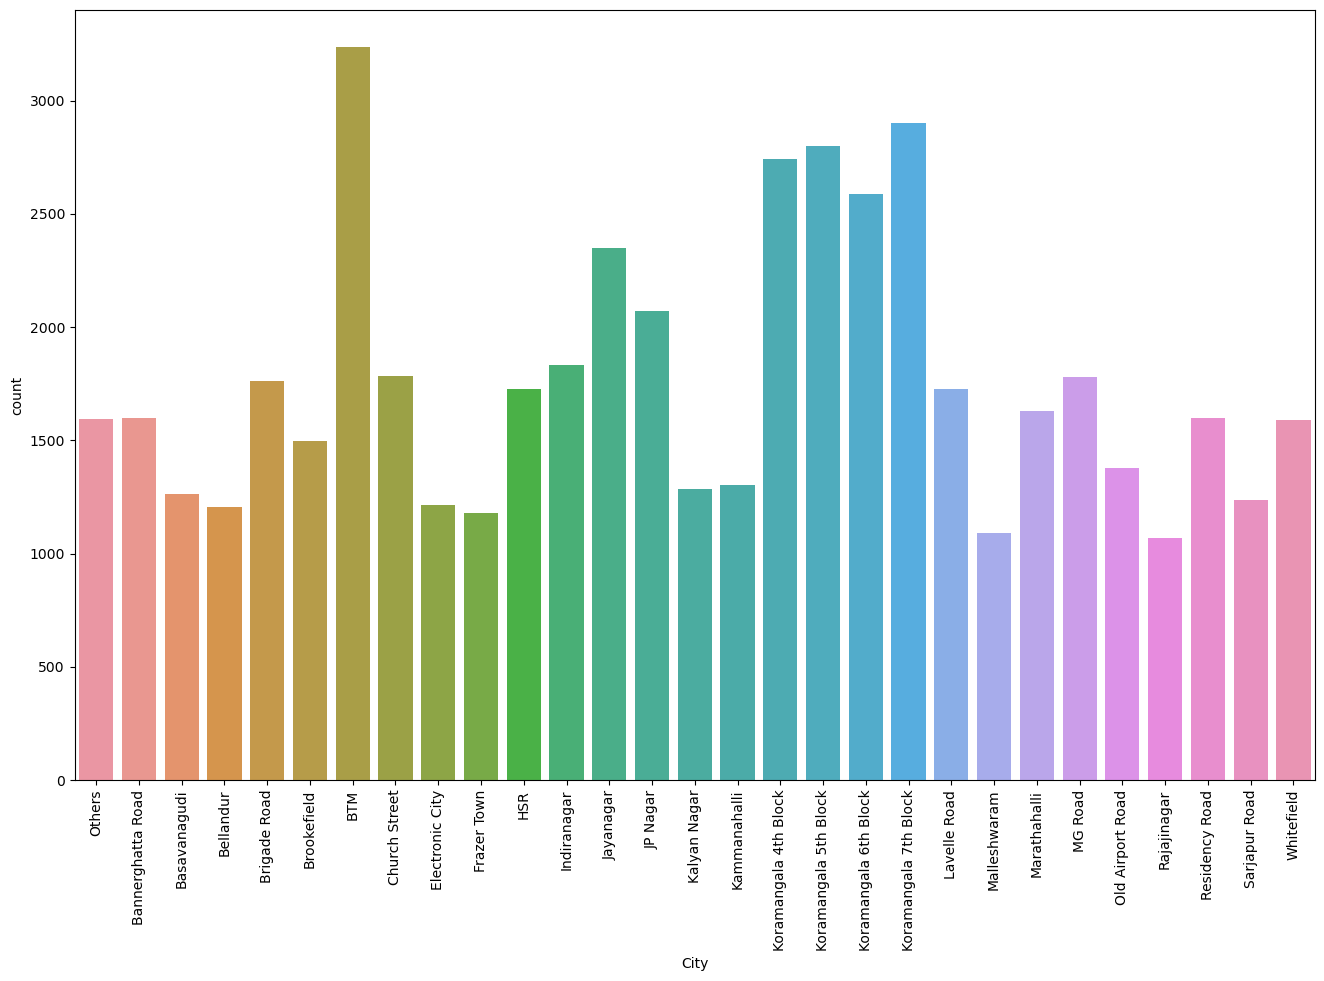

In [172]:
plt.figure(figsize=(16,10))
sns.countplot(df['City'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='online_order', ylabel='count'>

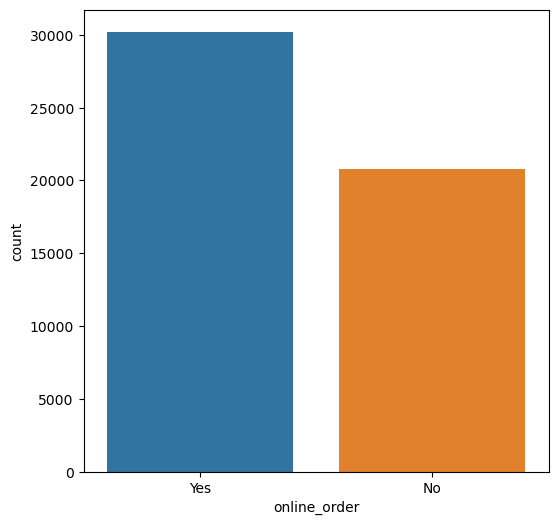

In [174]:
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'])

<AxesSubplot:xlabel='book_table', ylabel='count'>

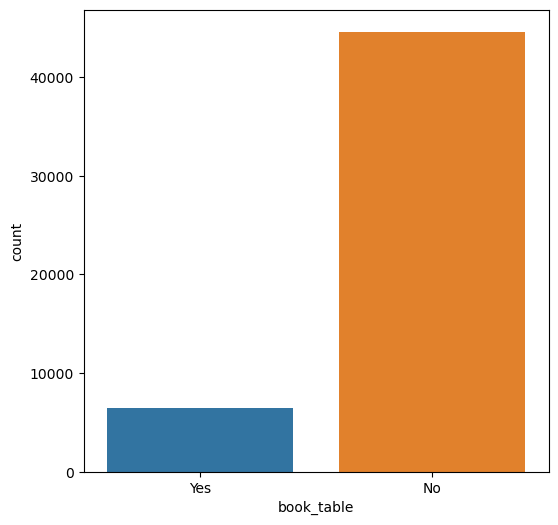

In [175]:
plt.figure(figsize=(6,6))
sns.countplot(df['book_table'])

<AxesSubplot:xlabel='book_table', ylabel='rate'>

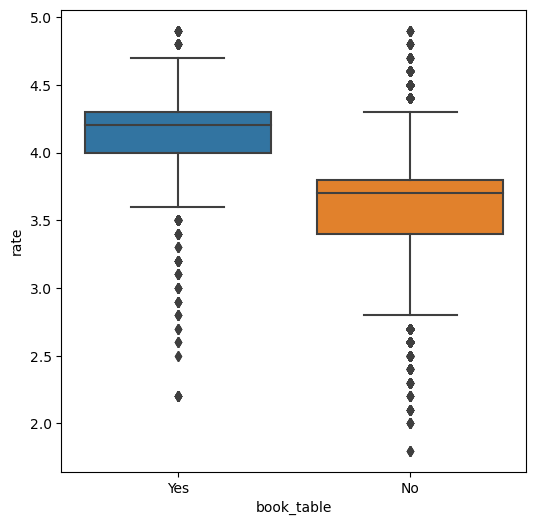

In [176]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

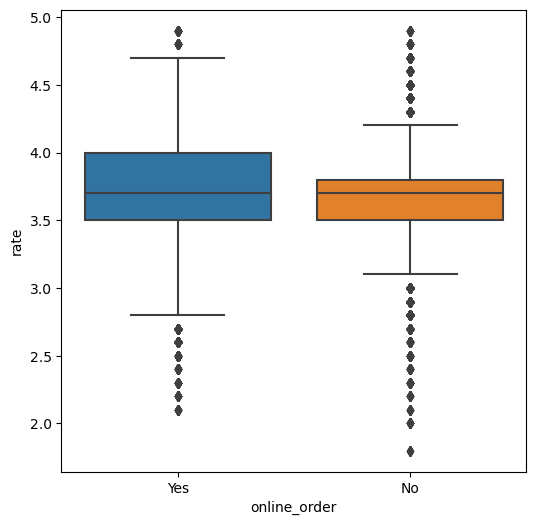

In [177]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

# Online ordering facility, City wise (PIVOT TABLE)

In [179]:
df1 = df.groupby(['City','online_order'])['name'].count()
df1.to_csv('City_online.csv')
df1 = pd.read_csv('City_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['City'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
City                             
BTM                    1129  2110
Bannerghatta Road       598  1002
Basavanagudi            470   794
Bellandur               394   811
Brigade Road            848   916
Brookefield             538   957
Church Street           929   856
Electronic City         657   557
Frazer Town             467   712
HSR                     545  1182
Indiranagar             772  1062
JP Nagar                743  1329
Jayanagar               772  1579
Kalyan Nagar            512   773
Kammanahalli            536   769
Koramangala 4th Block   957  1785
Koramangala 5th Block  1034  1765
Koramangala 6th Block   926  1662
Koramangala 7th Block  1109  1792
Lavelle Road            987   739
MG Road                 919   861
Malleshwaram            431   661
Marathahalli            685   944
Old Airport Road        578   802
Others                  645   949
Rajajinagar             529   539
Residency Road          896   704
Sarjapur Road           466   769
Whitefield              742   847

<AxesSubplot:xlabel='City'>

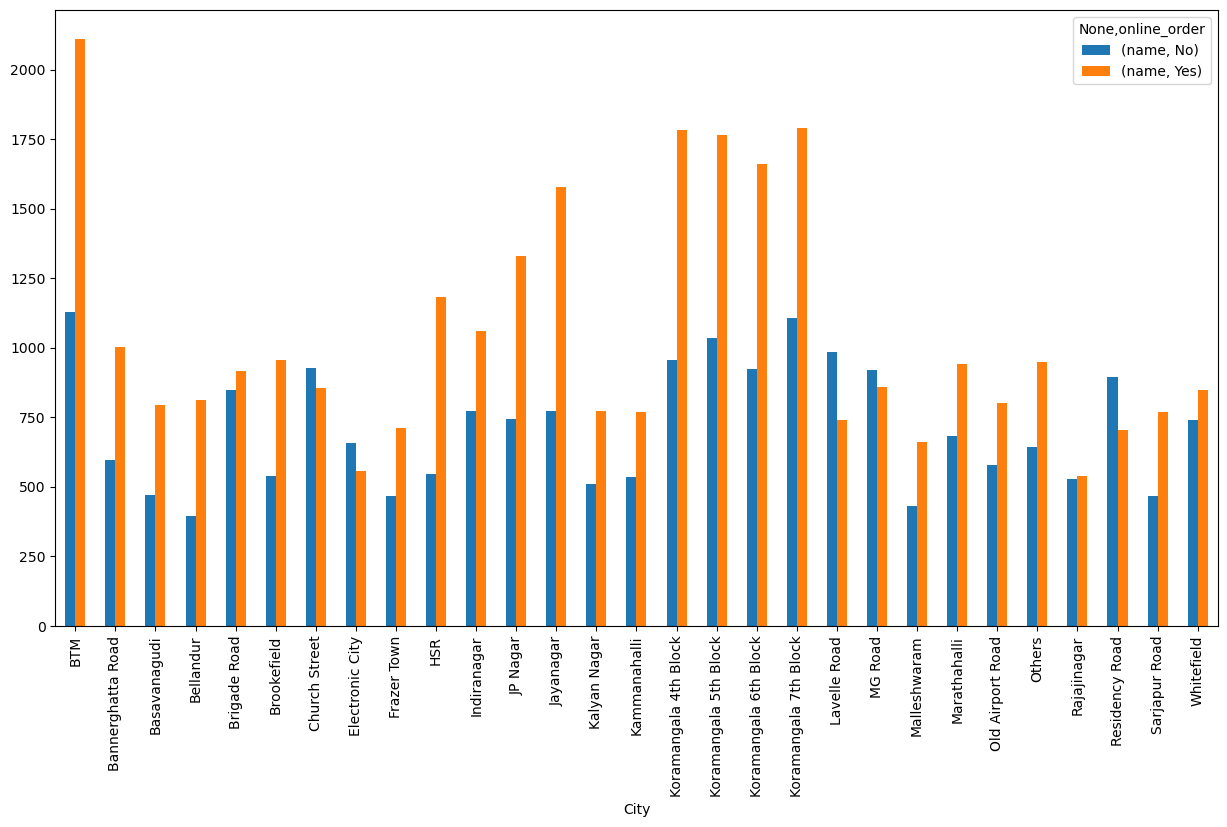

In [180]:
df1.plot(kind = 'bar', figsize = (15,8))

# Types of Restaurants VS Rating

<AxesSubplot:xlabel='Type', ylabel='rate'>

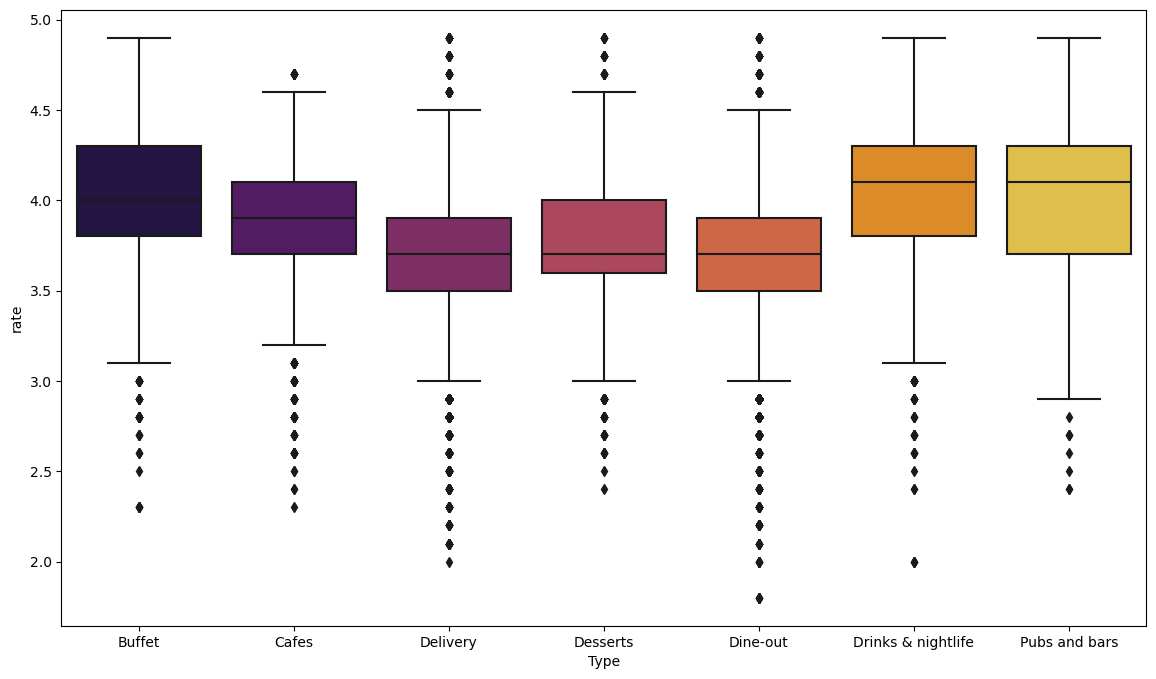

In [181]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')

In [182]:
df3 = df.groupby(['City','Type'])['name'].count()
df3.to_csv('City_Type.csv')
df3 = pd.read_csv('City_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['City'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
City                                                            
BTM                       39    99     1769      192     1044   
Bannerghatta Road         17    42      901      116      506   
Basavanagudi              15    46      636      109      446   
Bellandur                 28    27      656       79      381   
Brigade Road              57    83      692      134      644   
Brookefield               33    35      845       86      482   
Church Street             60    86      650      137      697   
Electronic City           22    24      554       71      501   
Frazer Town               14    46      648       87      357   
HSR                       21    48      991      113      518   
Indiranagar               38    80      839      147      616   
JP Nagar                  25    62     1134      156      672   
Jayanagar                 29    76     1359      173      691   
Kalyan Nagar              11    54      650       90      465   
Kammanahalli               0    55      668       96      470   
Koramangala 4th Block     43   106     1482      164      886   
Koramangala 5th Block     36    44     1506      176      914   
Koramangala 6th Block     34   101     1374      171      850   
Koramangala 7th Block     37   104     1508      181      948   
Lavelle Road              64    82      623      131      742   
MG Road                   54    77      725      137      641   
Malleshwaram              22    29      544       89      365   
Marathahalli              31    28      844       96      609   
Old Airport Road          27    50      693      104      425   
Others                    11    53      832      102      574   
Rajajinagar               17    22      448      101      436   
Residency Road            59    76      606      129      655   
Sarjapur Road             25    30      635       82      424   
Whitefield                 0    38      767      110      603   

                                                        
Type                  Drinks & nightlife Pubs and bars  
City                                                    
BTM                                   45            51  
Bannerghatta Road                     18             0  
Basavanagudi                          12             0  
Bellandur                             17            17  
Brigade Road                          77            77  
Brookefield                           14             0  
Church Street                         79            76  
Electronic City                       21            21  
Frazer Town                           11            16  
HSR                                   14            22  
Indiranagar                           57            57  
JP Nagar                              23             0  
Jayanagar                             23             0  
Kalyan Nagar                          15             0  
Kammanahalli                          16             0  
Koramangala 4th Block                 61             0  
Koramangala 5th Block                 58            65  
Koramangala 6th Block                 58             0  
Koramangala 7th Block                 59            64  
Lavelle Road                          84             0  
MG Road                               73            73  
Malleshwaram                          23            20  
Marathahalli                          21             0  
Old Airport Road                      39            42  
Others                                15             7  
Rajajinagar                           20            24  
Residency Road                        75             0  
Sarjapur Road                         20            19  
Whitefield                            36            35

<AxesSubplot:xlabel='City'>

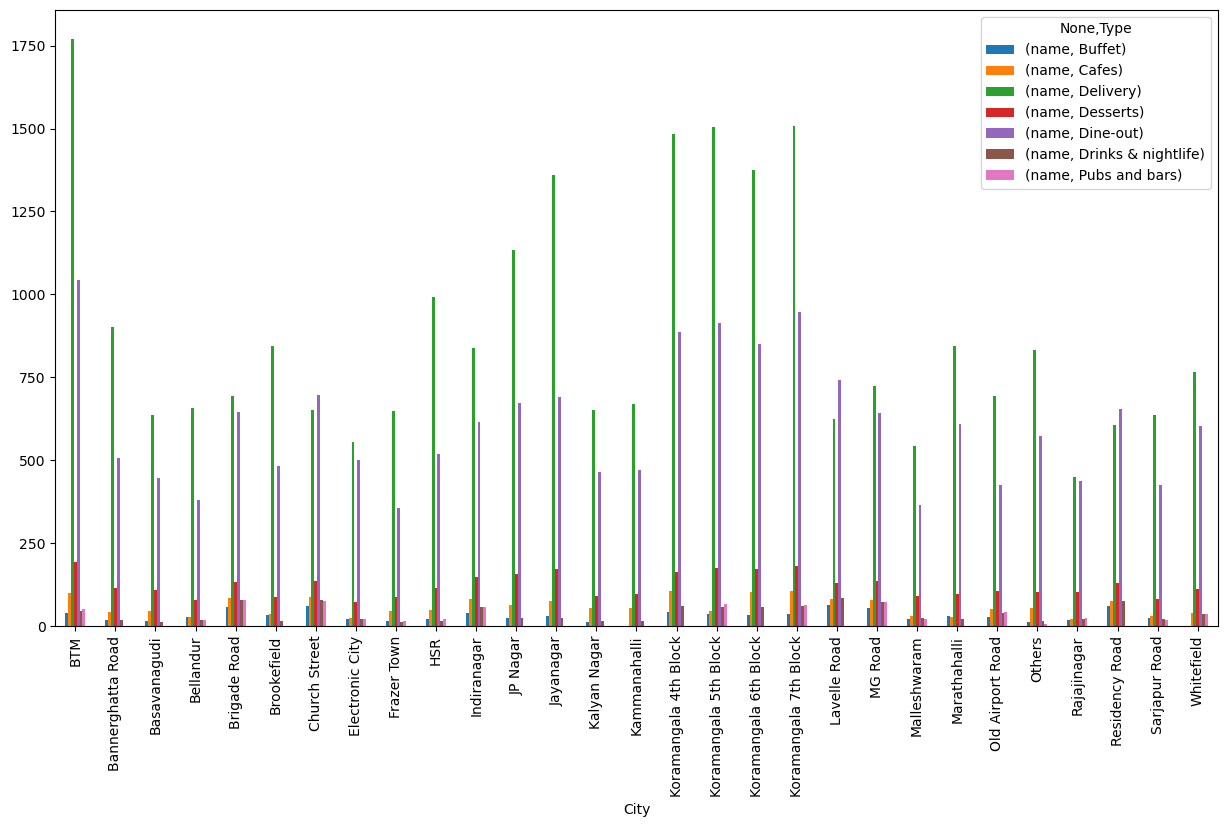

In [183]:
df3.plot(kind = 'bar', figsize = (15,8))

# TOP Cuisines

In [184]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
Others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [185]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

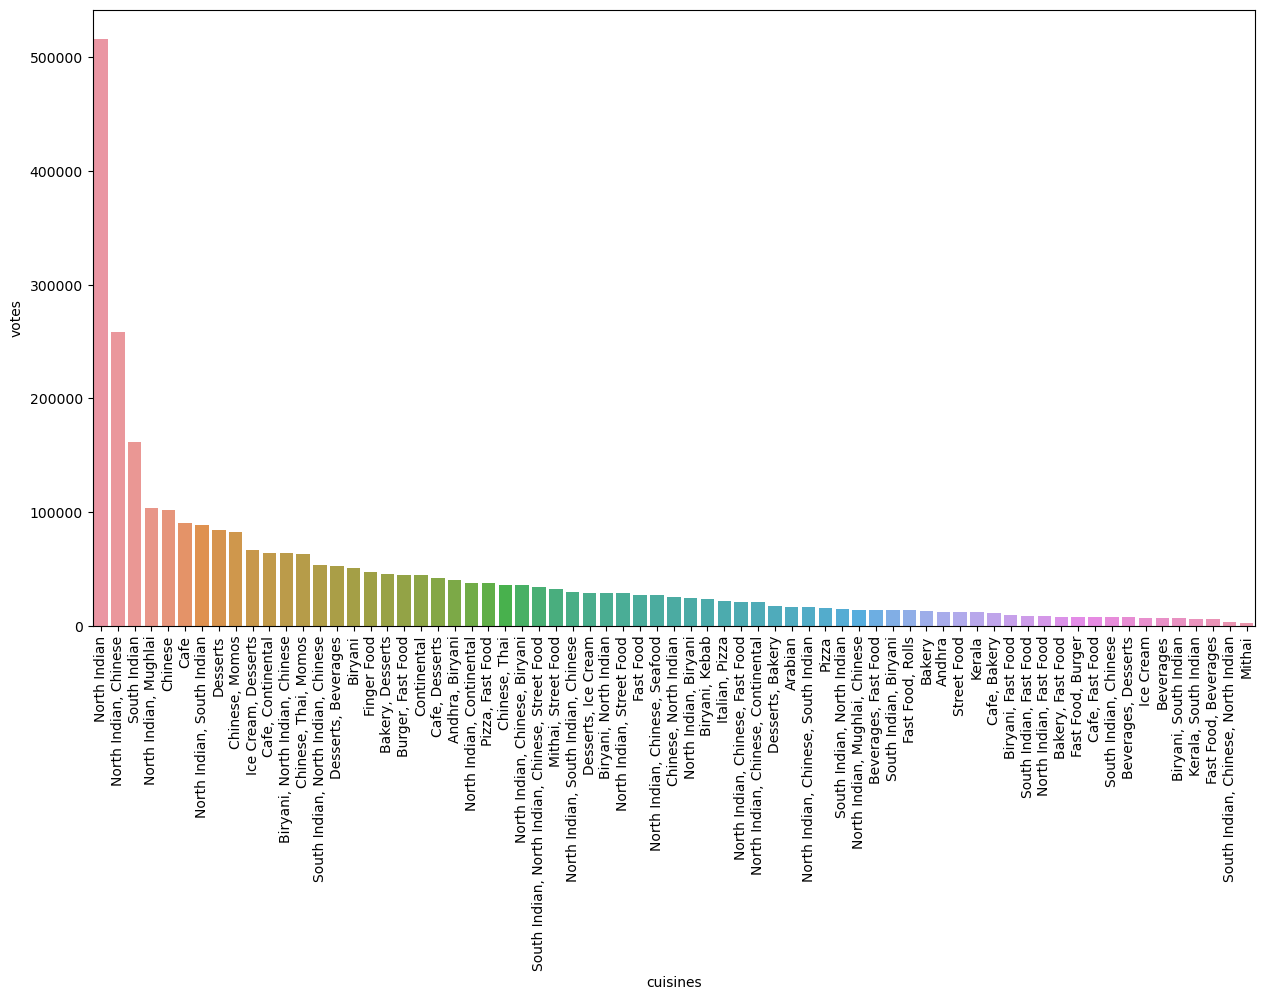

In [188]:
plt.figure(figsize = (15,8))
sns.barplot(df7.index , df7['votes'])
plt.xticks(rotation = 90)